In [1]:
import pickle
import numpy

In [4]:
with open('samples3_final.pkl', 'rb') as f:
    data = pickle.load(f)
data

/Users/thomas/miniforge3/envs/motion-privacy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{b'S004C001P007R002A002': {'anonymized_skeleton': tensor([[-0.0043, -0.2904,  0.0569,  ...,  0.1752, -0.1326, -0.1556],
          [-0.0055, -0.2882,  0.0545,  ...,  0.1695, -0.1264, -0.1599],
          [-0.0032, -0.2873,  0.0521,  ...,  0.1741, -0.1192, -0.1665],
          ...,
          [-0.0070, -0.2929,  0.0378,  ...,  0.0687,  0.2337, -0.2338],
          [-0.0079, -0.2930,  0.0373,  ...,  0.0632,  0.2635, -0.2407],
          [-0.0083, -0.2934,  0.0422,  ...,  0.0538,  0.2961, -0.2439]],
         requires_grad=True),
  'dummy_file': b'S014C001P019R001A001',
  'reference_file': b'S004C001P007R002A002',
  'dummy_skeleton': tensor([[[-0.0117, -0.2635,  0.0644],
           [ 0.0047,  0.0030,  0.0098],
           [ 0.0241,  0.2654, -0.0552],
           ...,
           [-0.0709, -0.0196, -0.2455],
           [ 0.0310, -0.3413, -0.2729],
           [ 0.0872, -0.3306, -0.2365]],
  
          [[-0.0119, -0.2635,  0.0644],
           [ 0.0046,  0.0029,  0.0100],
           [ 0.0239,  0.2651, 

In [3]:
samples = list(data.keys())
samples

[b'S004C001P007R002A002',
 b'S012C001P017R001A020',
 b'S010C001P017R002A001',
 b'S004C001P007R002A020',
 b'S010C001P016R001A028',
 b'S011C001P007R001A042',
 b'S015C001P007R002A020',
 b'S011C001P008R002A020',
 b'S015C001P019R002A020',
 b'S011C001P016R002A028',
 b'S012C001P007R002A007',
 b'S010C001P015R002A008',
 b'S010C001P007R001A009',
 b'S011C001P008R002A043',
 b'S007C001P007R002A009',
 b'S010C001P015R001A020',
 b'S011C001P007R002A028',
 b'S012C001P008R001A043',
 b'S006C001P007R001A028',
 b'S009C001P016R001A025',
 b'S007C001P015R001A009',
 b'S001C001P007R002A020',
 b'S006C001P008R002A020',
 b'S014C001P007R001A025',
 b'S003C001P017R002A025',
 b'S002C001P007R001A008',
 b'S005C001P017R002A008',
 b'S007C001P007R001A025',
 b'S010C001P019R002A028',
 b'S015C001P007R001A028',
 b'S007C001P016R001A028',
 b'S010C001P015R001A021',
 b'S004C001P007R001A002',
 b'S010C001P017R001A009',
 b'S016C001P025R001A020',
 b'S012C001P008R002A031',
 b'S017C001P009R001A007',
 b'S003C001P015R002A025',
 b'S011C001P

In [4]:
def parse_file_name(file_name):
    """Parses the filename into a dictionary of parts."""
    file_name = str(file_name)
    if file_name[0] == 'b': # SGN preprocessing
        S = int(file_name[3:6])
        C = int(file_name[7:10])
        P = int(file_name[11:14])
        R = int(file_name[15:18])
        A = int(file_name[19:22])
    else:
        S = int(file_name[1:4])
        C = int(file_name[5:8])
        P = int(file_name[9:12])
        R = int(file_name[13:16])
        A = int(file_name[17:20])
    return {'S': S, 'C': C, 'P': P, 'R': R, 'A': A}

sample_info = [parse_file_name(sample) for sample in samples]
sample_info

[{'S': 4, 'C': 1, 'P': 7, 'R': 2, 'A': 2},
 {'S': 12, 'C': 1, 'P': 17, 'R': 1, 'A': 20},
 {'S': 10, 'C': 1, 'P': 17, 'R': 2, 'A': 1},
 {'S': 4, 'C': 1, 'P': 7, 'R': 2, 'A': 20},
 {'S': 10, 'C': 1, 'P': 16, 'R': 1, 'A': 28},
 {'S': 11, 'C': 1, 'P': 7, 'R': 1, 'A': 42},
 {'S': 15, 'C': 1, 'P': 7, 'R': 2, 'A': 20},
 {'S': 11, 'C': 1, 'P': 8, 'R': 2, 'A': 20},
 {'S': 15, 'C': 1, 'P': 19, 'R': 2, 'A': 20},
 {'S': 11, 'C': 1, 'P': 16, 'R': 2, 'A': 28},
 {'S': 12, 'C': 1, 'P': 7, 'R': 2, 'A': 7},
 {'S': 10, 'C': 1, 'P': 15, 'R': 2, 'A': 8},
 {'S': 10, 'C': 1, 'P': 7, 'R': 1, 'A': 9},
 {'S': 11, 'C': 1, 'P': 8, 'R': 2, 'A': 43},
 {'S': 7, 'C': 1, 'P': 7, 'R': 2, 'A': 9},
 {'S': 10, 'C': 1, 'P': 15, 'R': 1, 'A': 20},
 {'S': 11, 'C': 1, 'P': 7, 'R': 2, 'A': 28},
 {'S': 12, 'C': 1, 'P': 8, 'R': 1, 'A': 43},
 {'S': 6, 'C': 1, 'P': 7, 'R': 1, 'A': 28},
 {'S': 9, 'C': 1, 'P': 16, 'R': 1, 'A': 25},
 {'S': 7, 'C': 1, 'P': 15, 'R': 1, 'A': 9},
 {'S': 1, 'C': 1, 'P': 7, 'R': 2, 'A': 20},
 {'S': 6, 'C': 

In [8]:
for key in data.keys():
    d = data[key]
    print(d.keys())
    break

dict_keys(['anonymized_skeleton', 'dummy_file', 'reference_file', 'dummy_skeleton', 'reference_skeleton', 'reference_action', 'reference_actor', 'dummy_action', 'dummy_actor', 'reference_action_pred', 'reference_actor_pred', 'anonymized_action_pred', 'anonymized_actor_pred', 'dummy_action_pred', 'dummy_actor_pred', 'reference_rotation', 'dummy_rotation', 'ground_truth_rotation'])


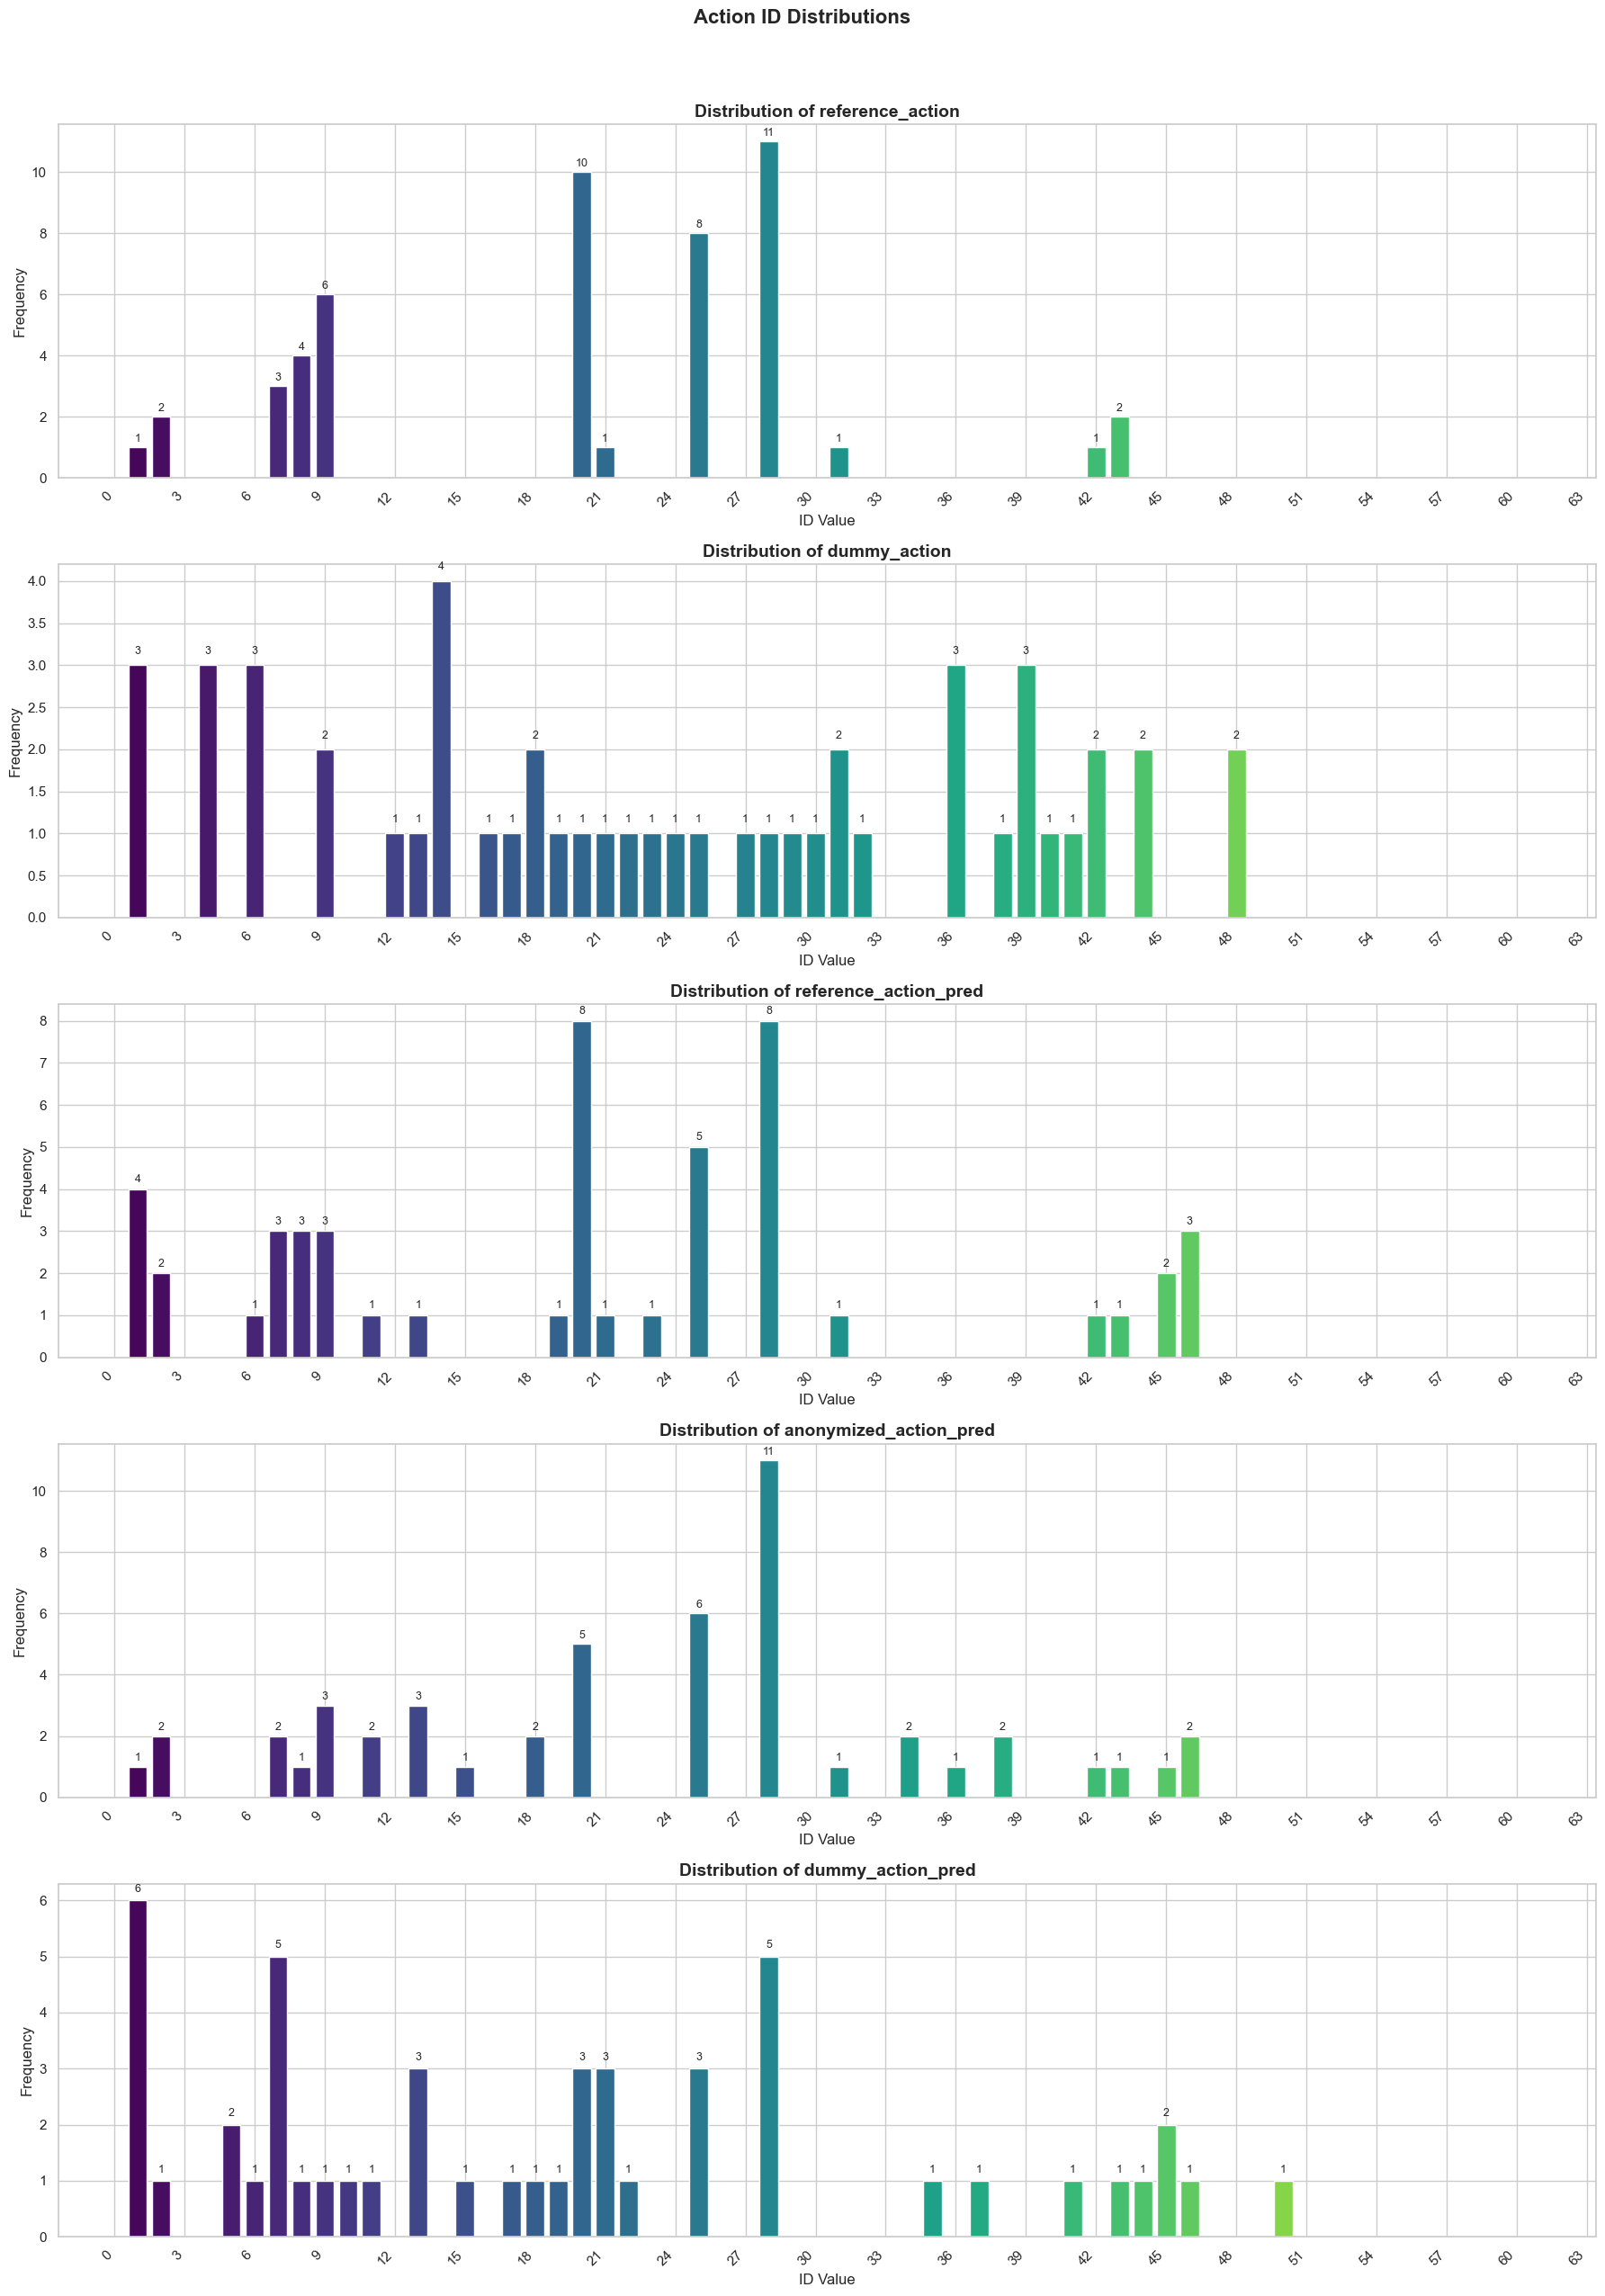

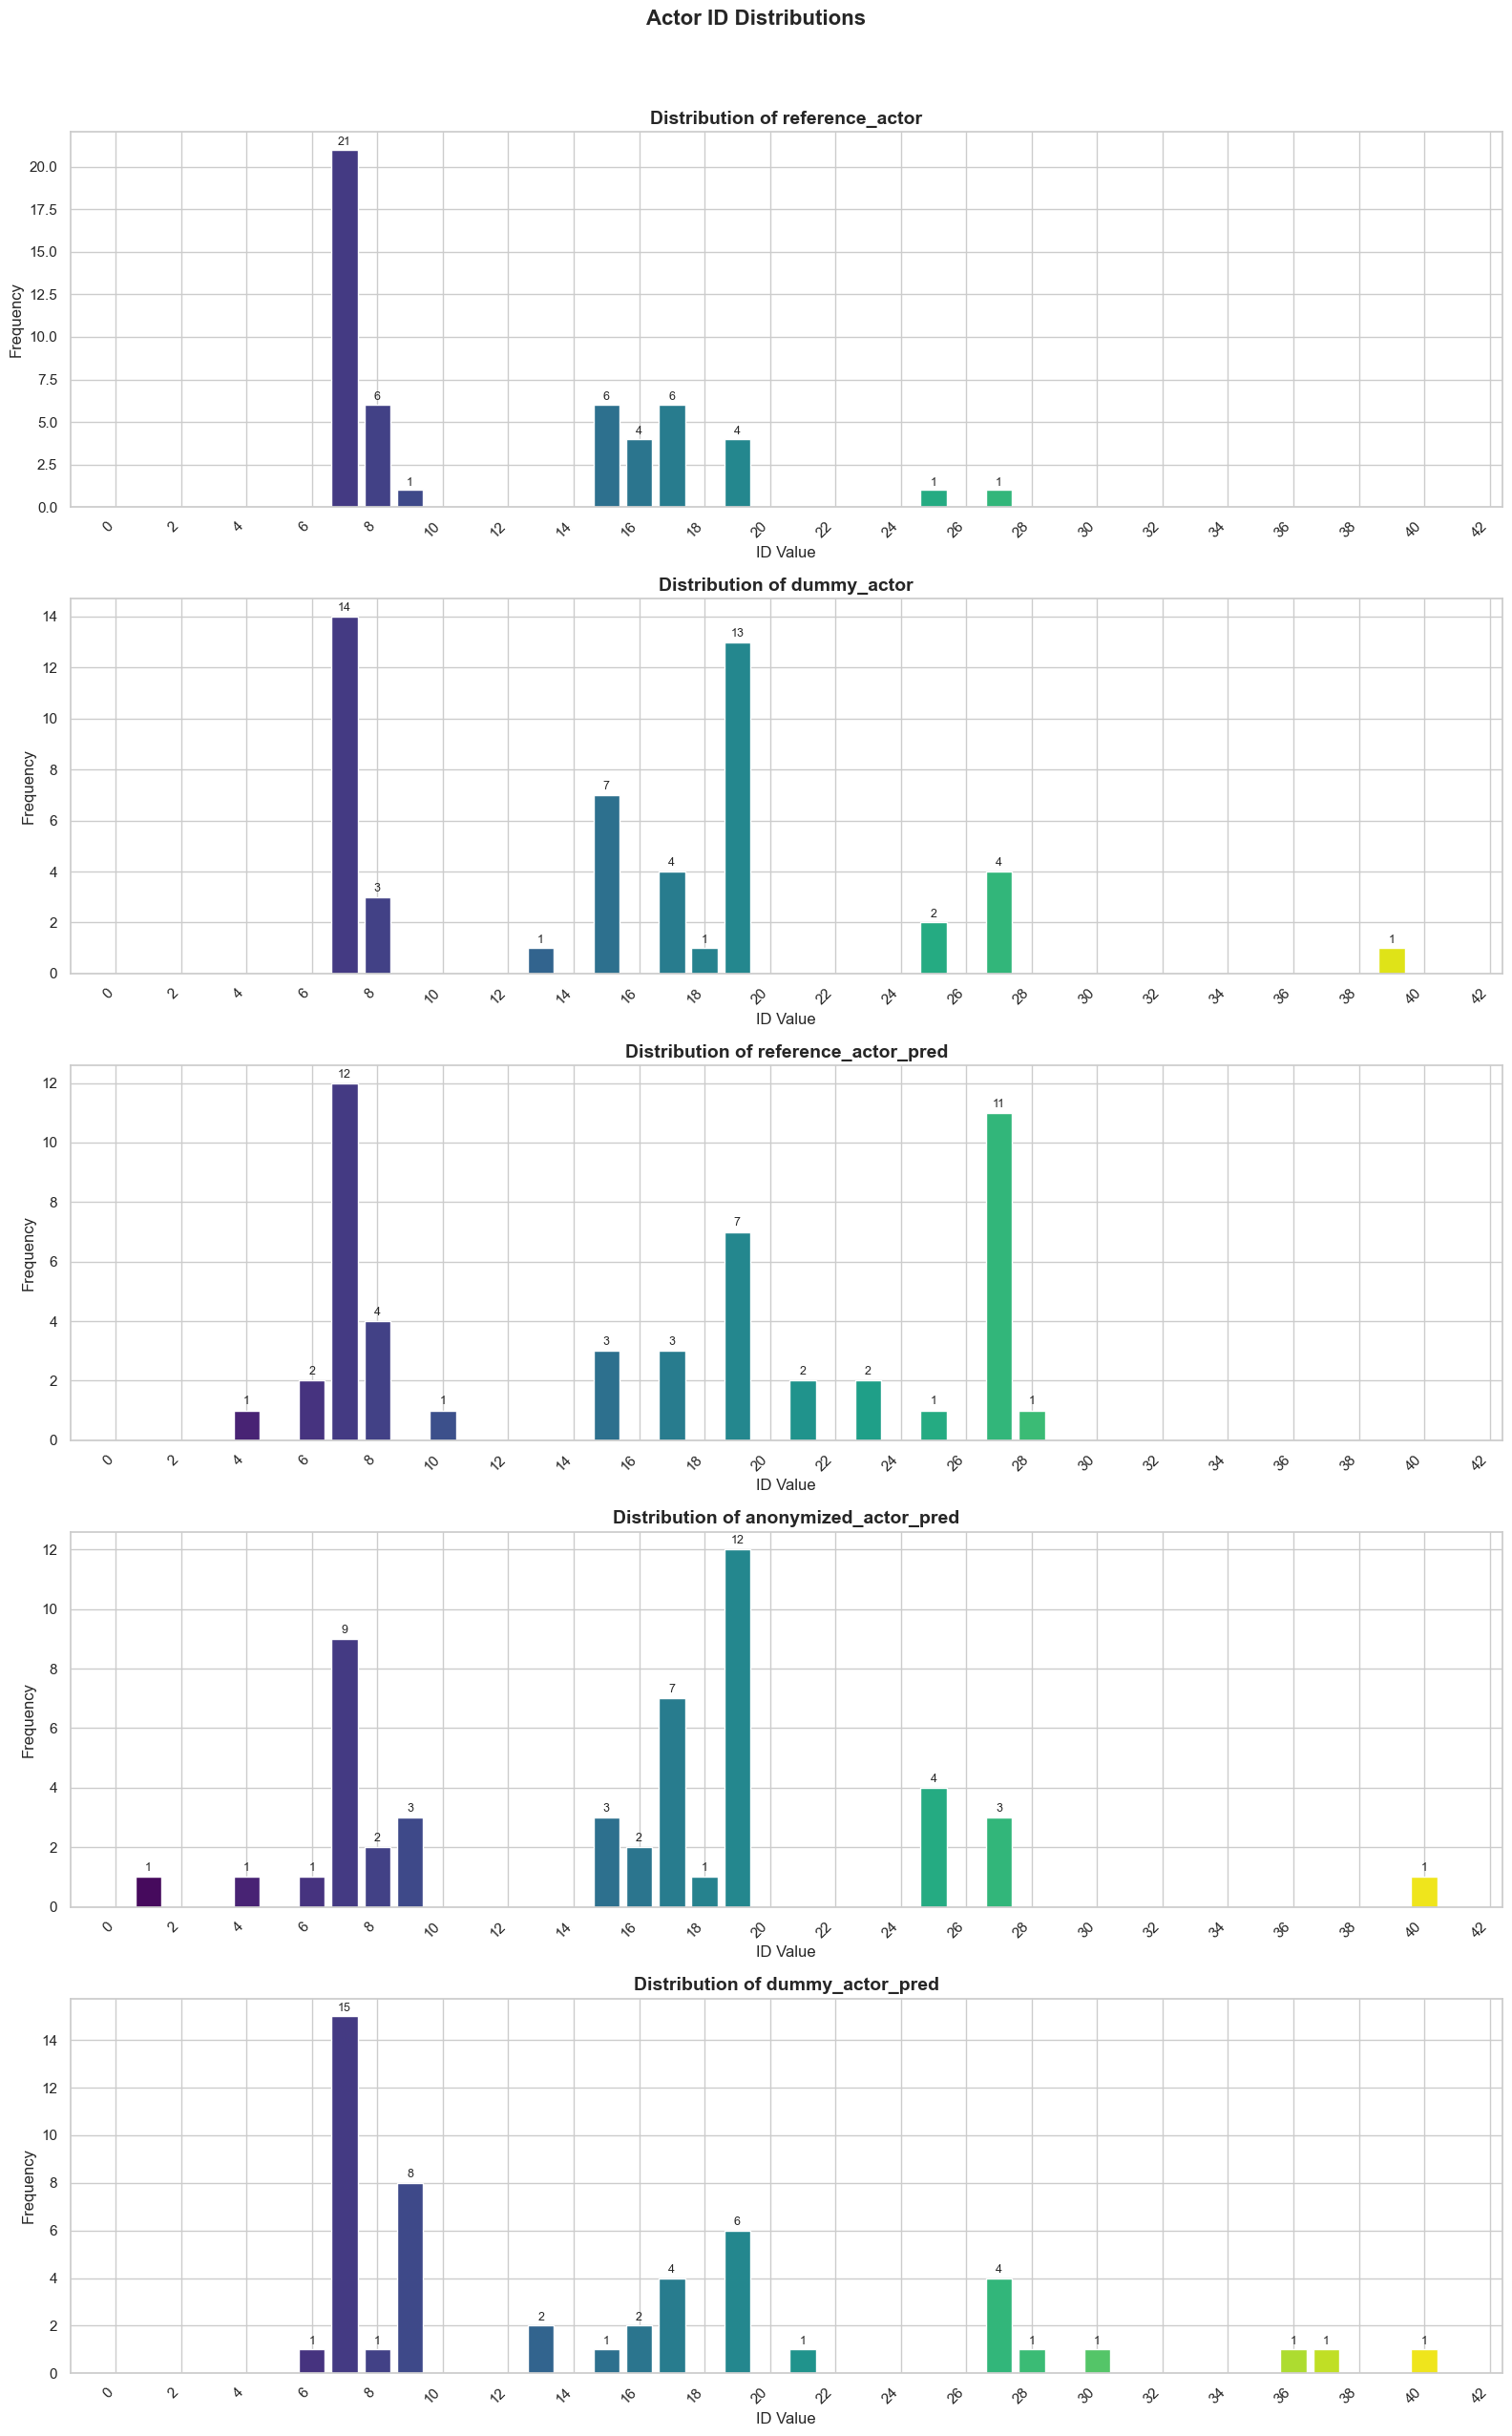

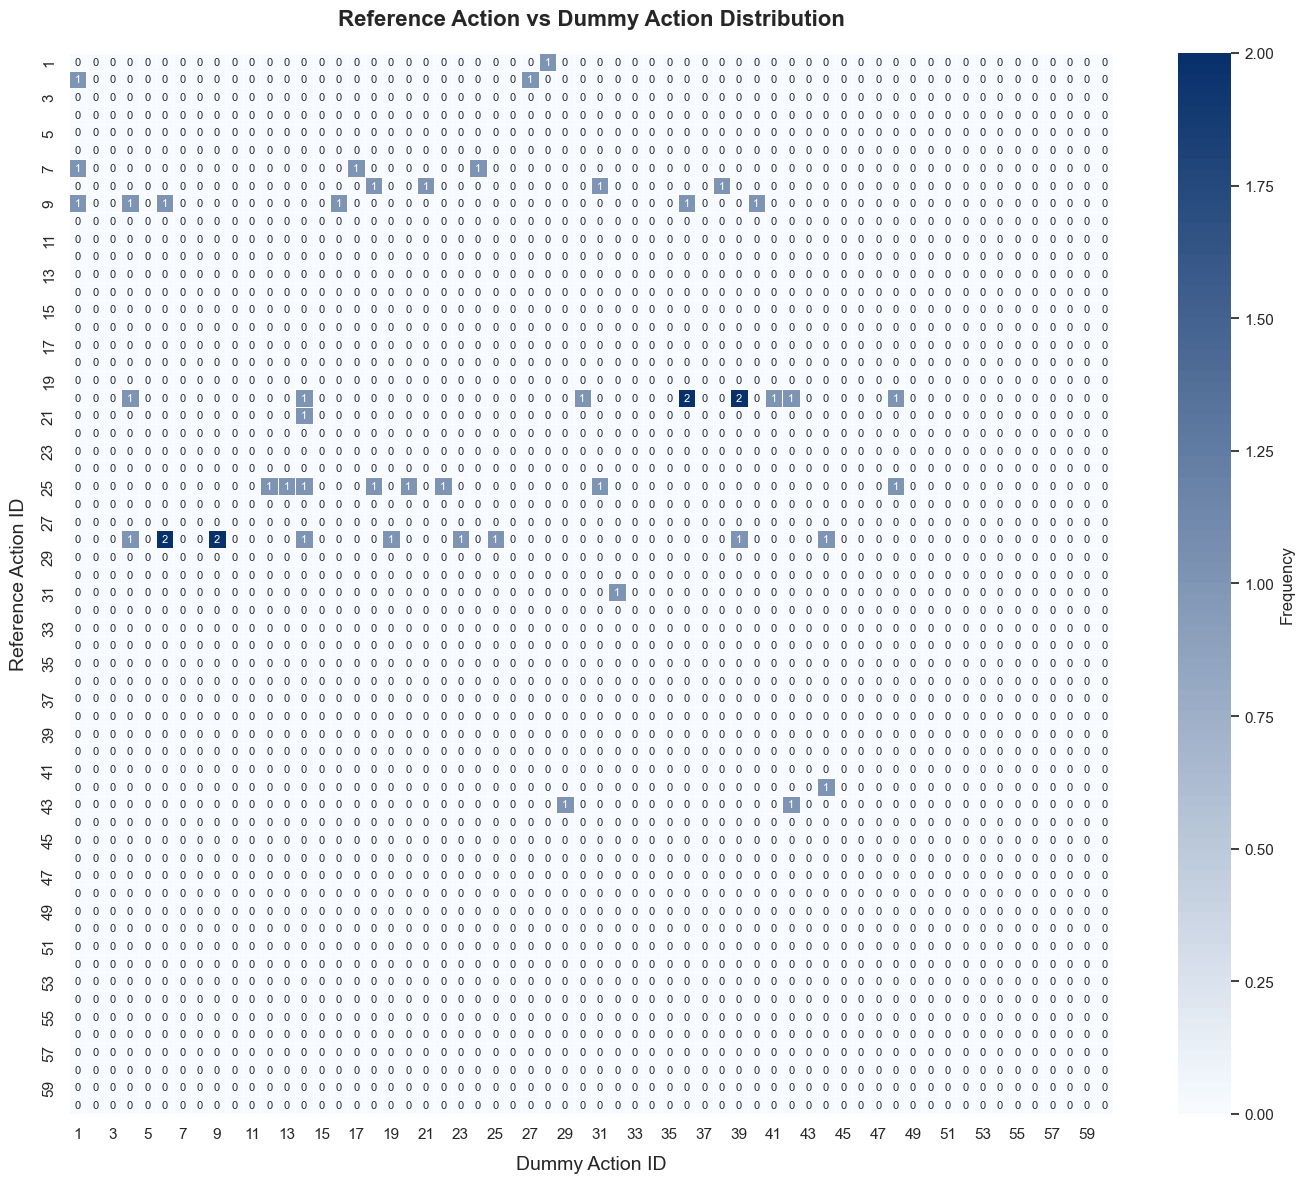

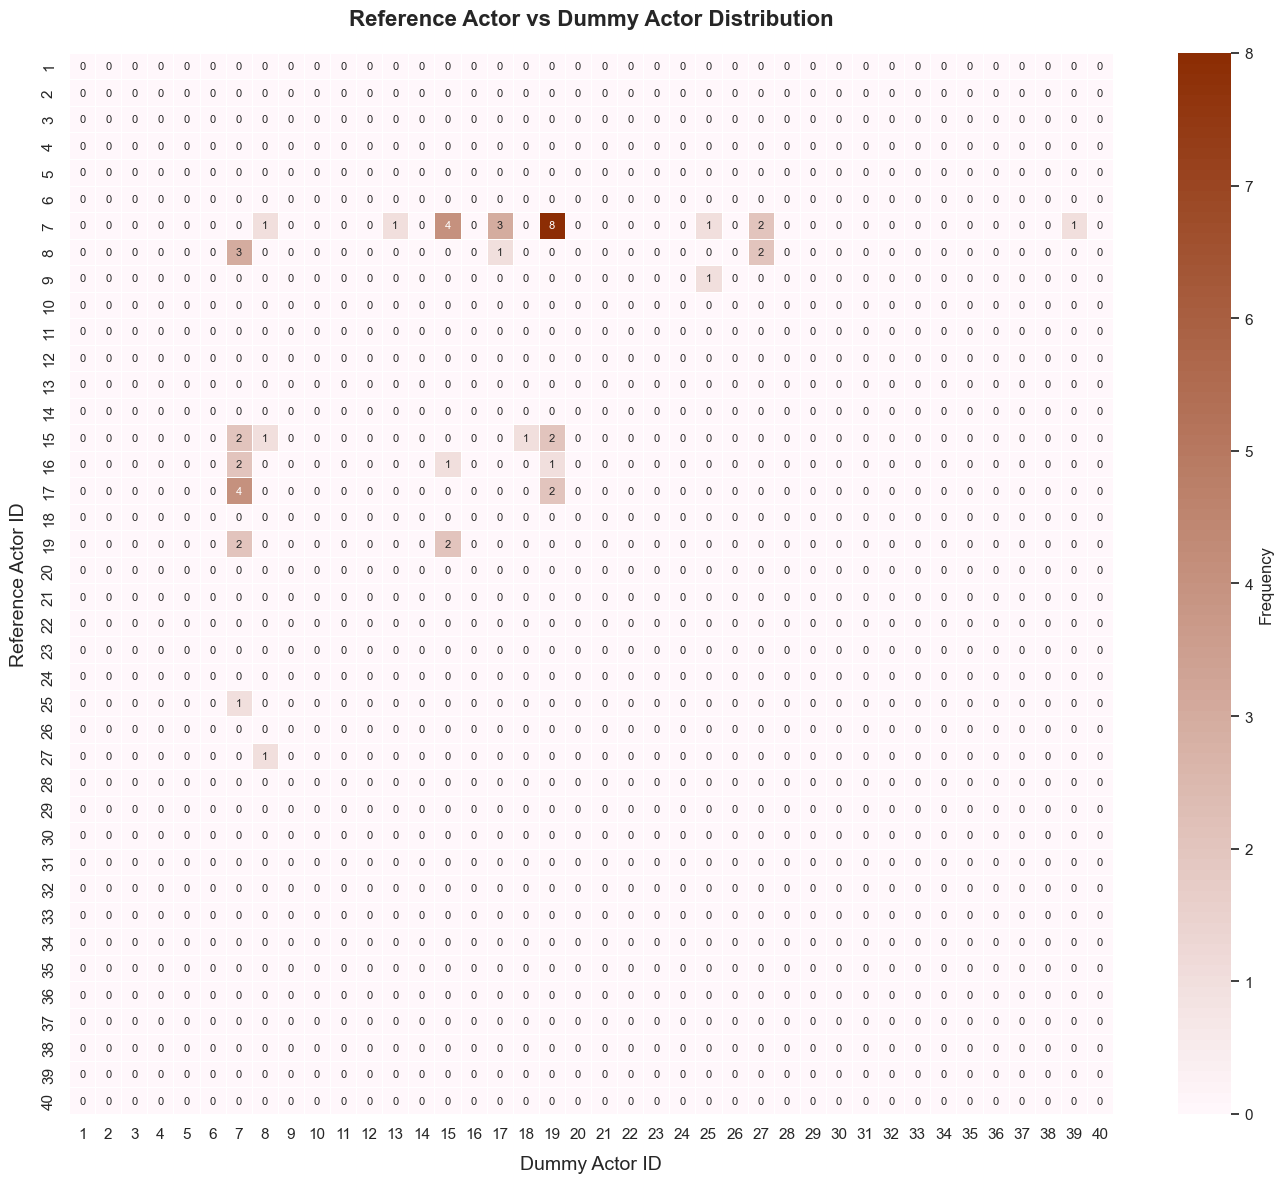

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

# Keys to skip (rotation or skeleton related)
skip_keys = [key for key in data[list(data.keys())[0]].keys() 
             if 'rotation' in key.lower() or 'skeleton' in key.lower()]

# Collect ID data across all samples
id_data = {}
for key in data[list(data.keys())[0]].keys():
    if key not in skip_keys and 'file' not in key.lower():
        id_data[key] = []
        for sample_id in data.keys():
            if key in data[sample_id]:
                id_data[key].append(data[sample_id][key])

# Set a nice aesthetic style
sns.set_theme(style="whitegrid")

# Create visualizations by category type
id_keys = list(id_data.keys())
action_keys = [k for k in id_keys if 'action' in k]
actor_keys = [k for k in id_keys if 'actor' in k]
other_keys = [k for k in id_keys if k not in action_keys and k not in actor_keys]

# Function to create enhanced bar plots with proper spacing
def create_enhanced_barplot(data_dict, keys, title, figsize=(16, 8), x_min=None, x_max=None):
    fig, axes = plt.subplots(len(keys), 1, figsize=figsize)
    if len(keys) == 1:
        axes = [axes]
        
    for i, key in enumerate(keys):
        # Create a full range DataFrame with all possible values
        values = np.array(data_dict[key])
        
        if x_min is not None and x_max is not None:
            # Create a properly spaced index with all potential values
            all_ids = list(range(x_min, x_max + 1))
            df_full = pd.DataFrame(index=all_ids, data={'count': 0})
            
            # Count occurrences of each value
            value_counts = pd.Series(values).value_counts()
            for idx, count in value_counts.items():
                if idx in df_full.index:
                    df_full.loc[idx, 'count'] = count
            
            # Plot using the full range dataframe
            ax = axes[i]
            bars = ax.bar(df_full.index, df_full['count'], color=sns.color_palette("viridis", n_colors=x_max-x_min+1))
            
            # Add value labels on top of bars
            for bar_idx, bar in enumerate(bars):
                if df_full['count'][bar_idx + x_min] > 0:
                    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                           str(int(df_full['count'][bar_idx + x_min])), 
                           ha='center', va='bottom', fontsize=9)
            
            # Set ticks for better visibility - show up to 20 ticks
            tick_spacing = max(1, (x_max - x_min + 1) // 20)
            ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
            ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
        else:
            # For non-fixed range plots
            value_counts = pd.Series(values).value_counts().sort_index()
            df = pd.DataFrame({'value': value_counts.index, 'count': value_counts.values})
            ax = axes[i]
            bars = sns.barplot(x='value', y='count', data=df, ax=ax, hue='value', legend=False)
            
            # Add value labels
            for bar in bars.patches:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                       str(int(bar.get_height())), 
                       ha='center', va='bottom', fontsize=9)
        
        # Enhance visuals
        ax.set_title(f'Distribution of {key}', fontsize=14, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=12)
        ax.set_xlabel('ID Value', fontsize=12)
        
        # Make x-axis labels more readable
        if x_min is not None and x_max is not None and (x_max - x_min) > 20:
            for label in ax.get_xticklabels():
                label.set_rotation(45)
                label.set_ha('right')
        
    plt.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    return fig

# Create plots for each category
if action_keys:
    create_enhanced_barplot(id_data, action_keys, "Action ID Distributions", 
                           figsize=(18, 5*len(action_keys)), 
                           x_min=1, x_max=60)
    plt.show()

if actor_keys:
    create_enhanced_barplot(id_data, actor_keys, "Actor ID Distributions", 
                           figsize=(16, 5*len(actor_keys)),
                           x_min=1, x_max=40)
    plt.show()

if other_keys:
    create_enhanced_barplot(id_data, other_keys, "Other Feature Distributions", 
                           figsize=(14, 5*len(other_keys)))
    plt.show()

# Create comparative heatmaps for reference vs dummy
# 1. Action comparison
ref_dummy_action_pairs = []

for sample_id in data.keys():
    sample = data[sample_id]
    if 'reference_action' in sample and 'dummy_action' in sample:
        ref_dummy_action_pairs.append((sample['reference_action'], sample['dummy_action']))

if ref_dummy_action_pairs:
    # Create custom colormap
    colors = ["#f7fbff", "#08306b"]
    cmap = LinearSegmentedColormap.from_list("custom_blues", colors, N=100)
    
    df_action = pd.DataFrame(ref_dummy_action_pairs, columns=['Reference Action', 'Dummy Action'])
    
    # Create a crosstab with all potential values from 1 to 60
    ref_range = range(1, 61)
    dummy_range = range(1, 61)
    
    # First create the standard crosstab
    raw_crosstab = pd.crosstab(df_action['Reference Action'], df_action['Dummy Action'])
    
    # Then create a full crosstab with all values from 1-60
    pivot_action = pd.DataFrame(0, index=ref_range, columns=dummy_range)
    
    # Fill in the values we have
    for idx in raw_crosstab.index:
        for col in raw_crosstab.columns:
            pivot_action.loc[idx, col] = raw_crosstab.loc[idx, col]
    
    plt.figure(figsize=(14, 12))
    ax = sns.heatmap(pivot_action, annot=True, cmap=cmap, fmt='d', linewidths=0.5, 
                    annot_kws={"size": 8}, cbar_kws={"label": "Frequency"})
    plt.title('Reference Action vs Dummy Action Distribution', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Dummy Action ID', fontsize=14, labelpad=10)
    ax.set_ylabel('Reference Action ID', fontsize=14, labelpad=10)
    plt.tight_layout()
    plt.show()

# 2. Actor comparison
ref_dummy_actor_pairs = []

for sample_id in data.keys():
    sample = data[sample_id]
    if 'reference_actor' in sample and 'dummy_actor' in sample:
        ref_dummy_actor_pairs.append((sample['reference_actor'], sample['dummy_actor']))

if ref_dummy_actor_pairs:
    # Create custom colormap
    colors = ["#fff7fb", "#8c2d04"]
    cmap = LinearSegmentedColormap.from_list("custom_reds", colors, N=100)
    
    df_actor = pd.DataFrame(ref_dummy_actor_pairs, columns=['Reference Actor', 'Dummy Actor'])
    
    # Create a crosstab with all potential values from 1 to 40
    ref_range = range(1, 41)
    dummy_range = range(1, 41)
    
    # First create the standard crosstab
    raw_crosstab = pd.crosstab(df_actor['Reference Actor'], df_actor['Dummy Actor'])
    
    # Then create a full crosstab with all values from 1-40
    pivot_actor = pd.DataFrame(0, index=ref_range, columns=dummy_range)
    
    # Fill in the values we have
    for idx in raw_crosstab.index:
        for col in raw_crosstab.columns:
            if idx in pivot_actor.index and col in pivot_actor.columns:
                pivot_actor.loc[idx, col] = raw_crosstab.loc[idx, col]
    
    plt.figure(figsize=(14, 12))
    ax = sns.heatmap(pivot_actor, annot=True, cmap=cmap, fmt='d', linewidths=0.5,
                    annot_kws={"size": 8}, cbar_kws={"label": "Frequency"})
    plt.title('Reference Actor vs Dummy Actor Distribution', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Dummy Actor ID', fontsize=14, labelpad=10)
    ax.set_ylabel('Reference Actor ID', fontsize=14, labelpad=10)
    plt.tight_layout()
    plt.show()